# EJERCICIOS

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import joblib
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,confusion_matrix,roc_auc_score
from sklearn.svm import SVC 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, accuracy_score
from scipy.stats import reciprocal
from sklearn.feature_extraction.text import TfidfVectorizer

## EJERCICIO 1

Vamos a trabajar con el siguiente conjunto de datos: https://www.datacamp.com/es/datalab/datasets/dataset-python-loans

| Variable      	| Explicación                                                                                                             |
|-------------------|-------------------------------------------------------------------------------------------------------------------------|
| credit_policy	    | 1 si el cliente cumple con los criterios de suscripción de crédito; 0 en caso contrario.                                |
| purpose	        | El propósito del préstamo.                                                                                              |
| int_rate	        | La tasa de interés del préstamo (a los prestatarios más riesgosos se les asignan tasas más altas).                      |
| installment	    | Las cuotas mensuales del prestamo                                                                                       |
| log_annual_inc    | El logaritmo natural del ingreso anual declarado por el prestatario.                                                    |
| dti	            | La relación deuda-ingreso del prestatario (monto de deuda dividido por ingresos anuales).                               |
| fico	            | El puntaje de crédito FICO del prestatario.                                                                             |
| days_with_cr_line	| El número de días que el prestatario ha tenido una línea de crédito.                                                    |
| revol_bal	        | El saldo rotativo del prestatario (monto no pagado al final del ciclo de facturación de la tarjeta).                    |
| revol_util        | La tasa de utilización de la línea de crédito del prestatario (monto de crédito utilizado respecto al total disponible).|
| inq_last_6mths	| El número de consultas de los acreedores al prestatario en los últimos 6 meses.                                         |
| delinq_2yrs	    | El número de veces que el prestatario ha estado más de 30 días en mora en un pago en los últimos 2 años.                |
| pub_rec	        | El número de registros públicos despectivos del prestatario.                                                            |
| not_fully_paid    | 1 si el préstamo se pagó totalmente; 0 en caso contrario.                                                        |

El csv lo tienes disponible en Moodle

Este conjunto de datos consta de más de 9500 préstamos con información sobre los datos del préstamo y si el préstamo fue pagado en su totalidad o no. Estos datos fueron extraídos de LendingClub.com
Crea un clasificador para predecir si un prestamo va a ser pagado o no.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [56]:
loan_data = pd.read_csv("/home/iabd/Documentos/Python_clase/SAPA/Ejercicios/datos/loan_data.csv")

#### EXPLORAR LOS DATOS

Entre otras cosas: estadísticas, matriz de correlaciones y borrar columnas innecesarias.

In [57]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [58]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [59]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [60]:
loan_data["purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [61]:
print(loan_data['not.fully.paid'].value_counts())

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64


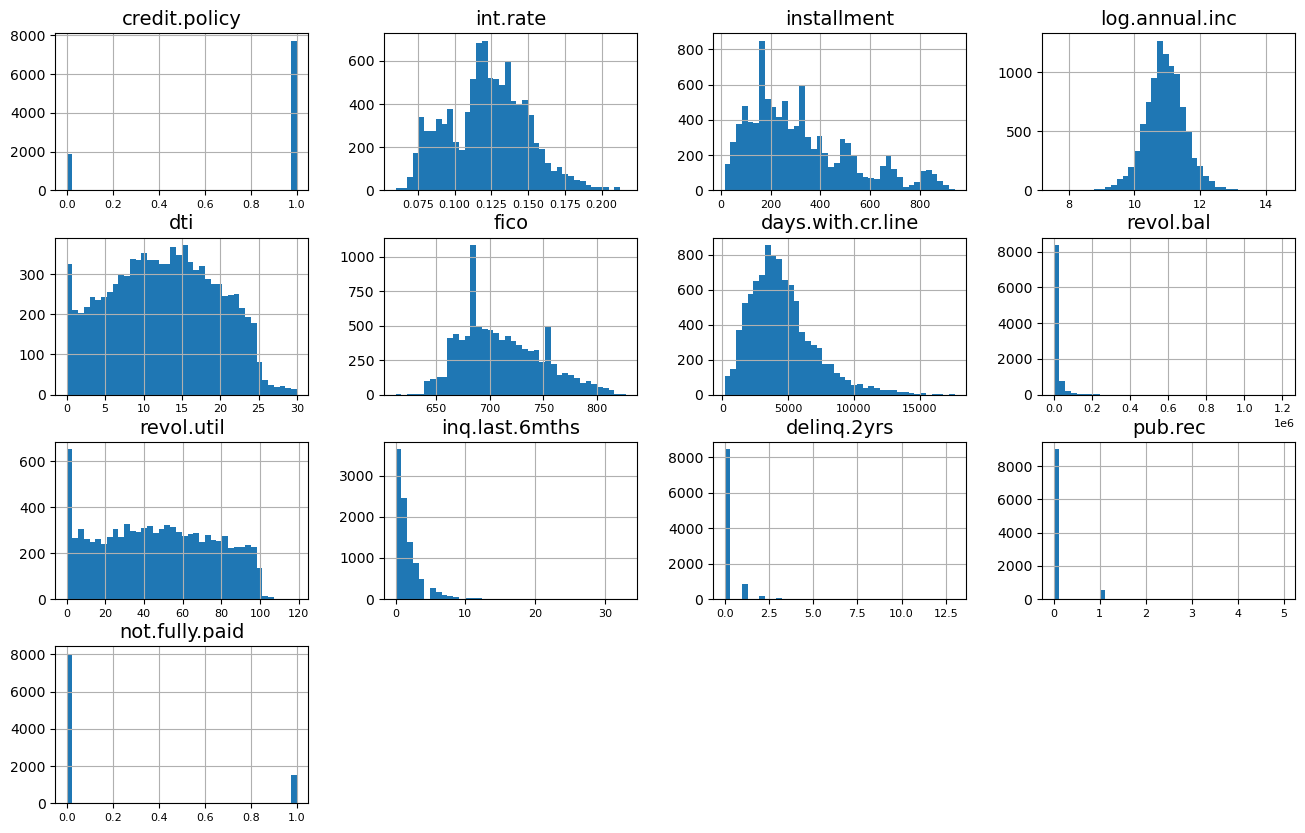

In [62]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data.hist(bins=40, figsize=(16, 10))
plt.show()

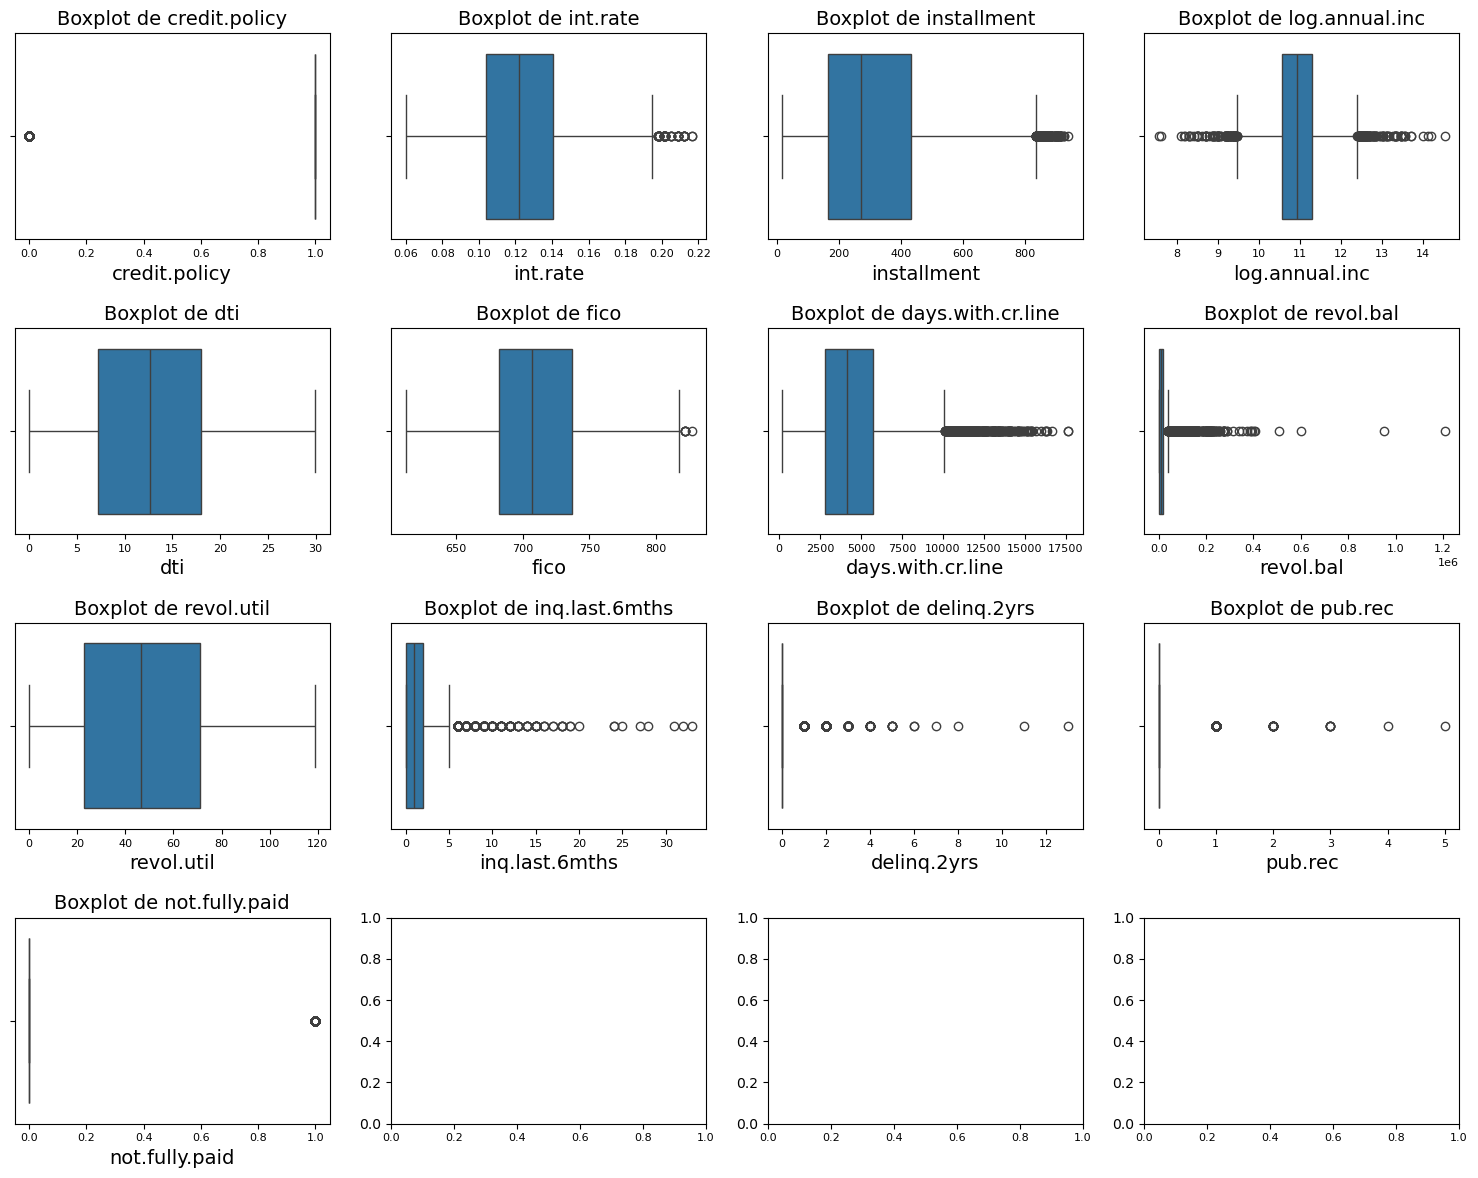

In [63]:
# Seleccionar las columnas numéricas
num_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns

# Definir el tamaño de la cuadrícula (3 filas y 3 columnas)
nrows = 4
ncols = 4

# Crear subgráficos en una cuadrícula de 3x3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

# Aplanar la matriz de ejes para poder iterar fácilmente
axes = axes.flatten()

# Crear boxplots para las columnas numéricas
for i in range(len(num_cols)):
    sns.boxplot(data=loan_data, x=num_cols[i], ax=axes[i])
    axes[i].set_title(f"Boxplot de {num_cols[i]}")

# Ajustar la disposición de los subgráficos para que no se superpongan
plt.tight_layout()

# Mostrar los boxplots
plt.show()



In [64]:
corr_matrix = loan_data.corr(numeric_only=True)
corr_matrix.style.background_gradient()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [65]:
corr_matrix["not.fully.paid"].sort_values(ascending=False)

not.fully.paid       1.000000
int.rate             0.159552
inq.last.6mths       0.149452
revol.util           0.082088
revol.bal            0.053699
installment          0.049955
pub.rec              0.048634
dti                  0.037362
delinq.2yrs          0.008881
days.with.cr.line   -0.029237
log.annual.inc      -0.033439
fico                -0.149666
credit.policy       -0.158119
Name: not.fully.paid, dtype: float64

In [66]:
# Vamos a eliminar toda columna que tenga una correlación absoluta menor a 0.04 con not_fully_paid
loan_data_clean = loan_data.drop(columns=["dti","delinq.2yrs","days.with.cr.line","log.annual.inc"])
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   credit.policy   9578 non-null   int64  
 1   purpose         9578 non-null   object 
 2   int.rate        9578 non-null   float64
 3   installment     9578 non-null   float64
 4   fico            9578 non-null   int64  
 5   revol.bal       9578 non-null   int64  
 6   revol.util      9578 non-null   float64
 7   inq.last.6mths  9578 non-null   int64  
 8   pub.rec         9578 non-null   int64  
 9   not.fully.paid  9578 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 748.4+ KB


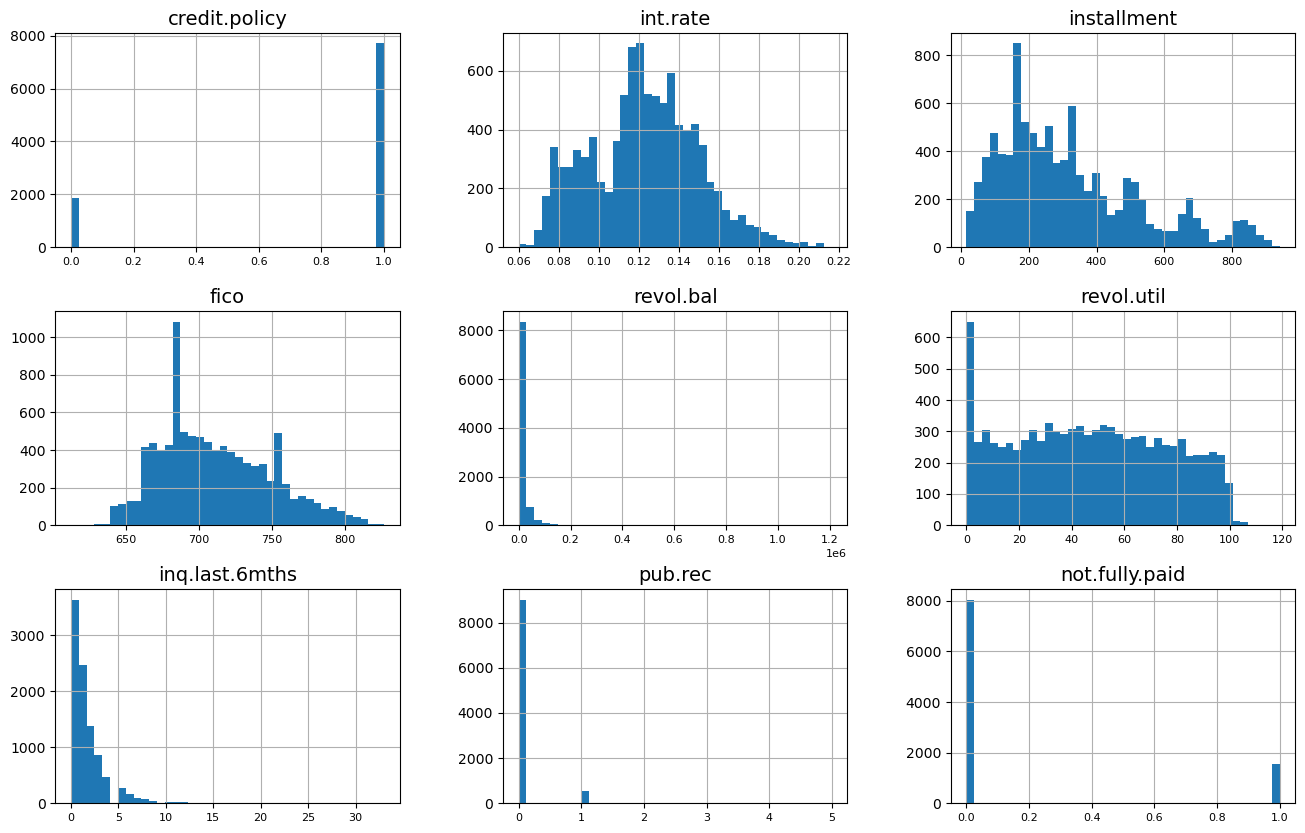

In [67]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
loan_data_clean.hist(bins=40, figsize=(16, 10))
plt.show()

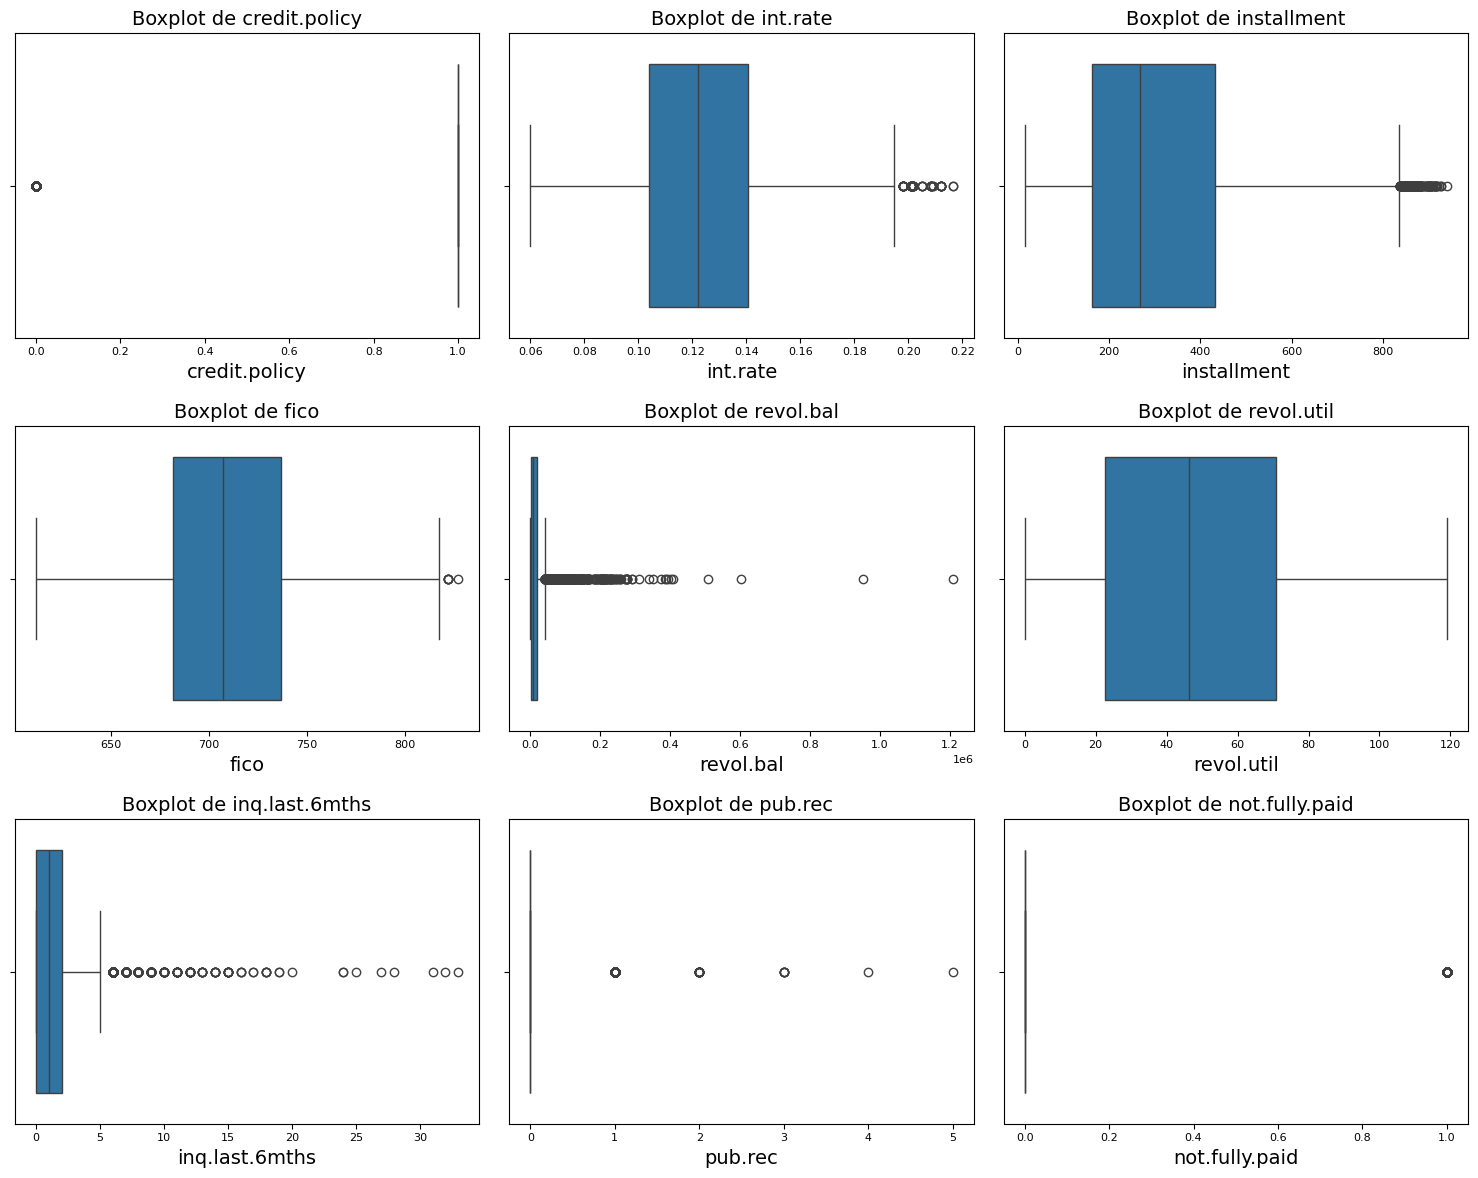

In [68]:
# Seleccionar las columnas numéricas
num_cols = loan_data_clean.select_dtypes(include=['float64', 'int64']).columns

# Definir el tamaño de la cuadrícula (3 filas y 3 columnas)
nrows = 3
ncols = 3

# Crear subgráficos en una cuadrícula de 3x3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 12))

# Aplanar la matriz de ejes para poder iterar fácilmente
axes = axes.flatten()

# Crear boxplots para las columnas numéricas
for i in range(len(num_cols)):
    sns.boxplot(data=loan_data, x=num_cols[i], ax=axes[i])
    axes[i].set_title(f"Boxplot de {num_cols[i]}")

# Ajustar la disposición de los subgráficos para que no se superpongan
plt.tight_layout()

# Mostrar los boxplots
plt.show()

#### DIVIDIR LOS DATOS

In [69]:
# Variables independientes (features)
X = loan_data_clean.drop('not.fully.paid', axis=1)

# Variable dependiente (target)
y = loan_data_clean['not.fully.paid']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ver las formas de los conjuntos resultantes
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (7662, 9)
Tamaño del conjunto de prueba: (1916, 9)


In [70]:
# Verificar las distribuciones de clases en entrenamiento y prueba
print("Distribución en entrenamiento:")
print(y_train.value_counts())

print("\nDistribución en prueba:")
print(y_test.value_counts())


Distribución en entrenamiento:
not.fully.paid
0    6434
1    1228
Name: count, dtype: int64

Distribución en prueba:
not.fully.paid
0    1611
1     305
Name: count, dtype: int64


#### PREPARAR LOS DATOS

In [71]:
from sklearn.pipeline import FunctionTransformer

purpose_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse_output=False, handle_unknown='ignore')
)

numeric_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

preprocessing = ColumnTransformer(
        [
            ('OHE', purpose_pipeline, ["purpose"]),
            ('numeric', numeric_pipeline, X.select_dtypes(include=[np.number]).columns.tolist())
        ],
    )

X_test_copy = X_test.copy()
df_test = preprocessing.fit_transform(X_test_copy)
column_names = preprocessing.get_feature_names_out()
df_test = pd.DataFrame(df_test, columns=column_names)
df_test.head()

,OHE__purpose_all_other,OHE__purpose_credit_card,OHE__purpose_debt_consolidation,OHE__purpose_educational,OHE__purpose_home_improvement,OHE__purpose_major_purchase,OHE__purpose_small_business,numeric__credit.policy,numeric__int.rate,numeric__installment,numeric__fico,numeric__revol.bal,numeric__revol.util,numeric__inq.last.6mths,numeric__pub.rec
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-2.037287,1.185570,0.609064,-1.432785,-0.237706,1.180467,0.726297,-0.228873
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.490849,-0.194115,0.991948,0.589921,-0.059303,-0.251024,0.726297,-0.228873
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.490849,-0.335132,-0.615984,-0.488856,-0.102427,1.305246,-0.730352,-0.228873
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.037287,1.570510,-1.054667,-1.028244,-0.254564,-0.774402,1.211846,-0.228873
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.490849,-0.049286,-0.797176,-0.219162,-0.432509,-1.419093,-0.244802,-0.228873


### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos:
- Regresión logisitca
- SGDClassifier
- K vecinos mas cercanos
- Random Forest

 y evalua los resultados en el conjunto de entrenamiento con las siguientes métricas: exactitud, prescisión, sensibilidad, f1, curva de roc y área bajo la curva de roc

Entrenando y probando el modelo: Regresión logistica
Exactitud en el conjunto de entrenamiento: 0.84
Precisión en el conjunto de entrenamiento: 0.55
Sensibilidad en el conjunto de entrenamiento: 0.02
F1-Score en el conjunto de entrenamiento: 0.04


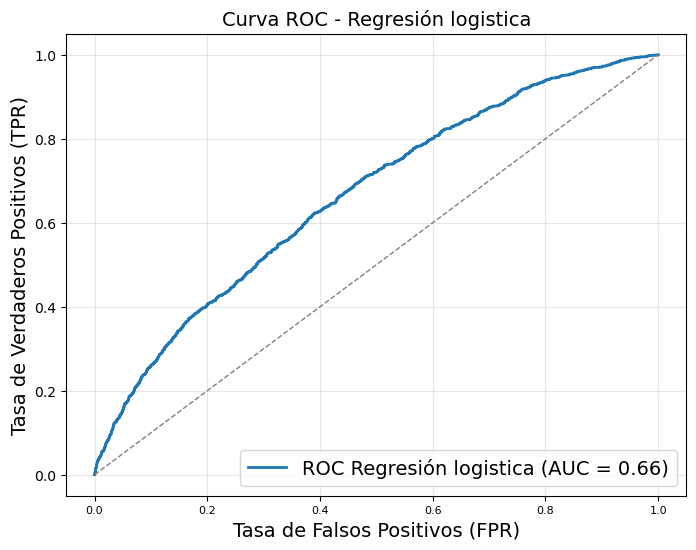

Área bajo la curva ROC: 0.66

Entrenando y probando el modelo: SGDClassifier
Exactitud en el conjunto de entrenamiento: 0.84
Precisión en el conjunto de entrenamiento: 0.41
Sensibilidad en el conjunto de entrenamiento: 0.04
F1-Score en el conjunto de entrenamiento: 0.07


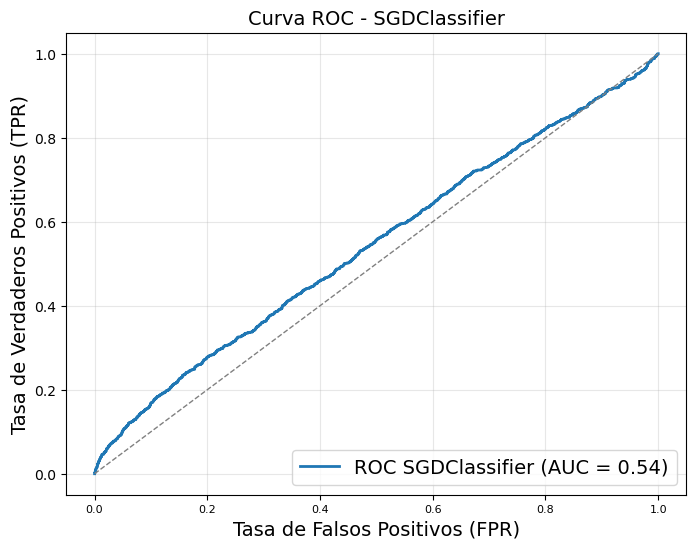

Área bajo la curva ROC: 0.54

Entrenando y probando el modelo: KNN
Exactitud en el conjunto de entrenamiento: 0.82
Precisión en el conjunto de entrenamiento: 0.29
Sensibilidad en el conjunto de entrenamiento: 0.08
F1-Score en el conjunto de entrenamiento: 0.13
KNN no soporta decision_function. Se omite cálculo de ROC.

Entrenando y probando el modelo: Random forest
Exactitud en el conjunto de entrenamiento: 0.84
Precisión en el conjunto de entrenamiento: 0.33
Sensibilidad en el conjunto de entrenamiento: 0.02
F1-Score en el conjunto de entrenamiento: 0.04
Random forest no soporta decision_function. Se omite cálculo de ROC.



In [72]:
models = {
    "Regresión logistica":LogisticRegression(random_state=42, max_iter=1000),
    "SGDClassifier":SGDClassifier(random_state=42),
    "KNN":KNeighborsClassifier(),
    "Random forest":RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"Entrenando y probando el modelo: {name}")
    
    # Crear pipeline para el modelo
    pipeline = make_pipeline(preprocessing,model)

    # Entrenar el modelo
    pipeline.fit(X_train, y_train)
    
    # Evaluación cruzada
    y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)

    # Calcular la exactitud
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calcular la precision
    train_precision = precision_score(y_train, y_train_pred)

    # Calcular la sensibildiad
    train_recall = recall_score(y_train, y_train_pred)

    # Calcular el F-1
    train_f1 = f1_score(y_train, y_train_pred)

    # Calcular el area bajo la curva de ROC
    train_roc_reg = roc_auc_score(y_train, y_train_pred)
    
    # Mostrar resultados
    print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')
    print(f'Precisión en el conjunto de entrenamiento: {train_precision:.2f}')
    print(f'Sensibilidad en el conjunto de entrenamiento: {train_recall:.2f}')
    print(f'F1-Score en el conjunto de entrenamiento: {train_f1:.2f}')

    # Evaluación cruzada para probabilidades
    if hasattr(model, 'decision_function'):
        y_train_proba = cross_val_predict(pipeline, X_train, y_train, cv=3, method='decision_function')
    else:
        print(f"{name} no soporta decision_function. Se omite cálculo de ROC.")
        print("")
        continue

    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
    roc_auc = roc_auc_score(y_train, y_train_proba)
    
    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC {name} (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Línea de referencia
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC - {name}')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

    print(f'Área bajo la curva ROC: {roc_auc:.2f}')
    print("")

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [73]:
# Crear pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression())
])

# Espacio de hiperparámetros a explorar
param_dist = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Inverso de la fuerza de regularización
    'classifier__solver': ['lbfgs', 'saga', 'liblinear'],       # Algoritmos de optimización
    'classifier__max_iter': [5000],                             # Número máximo de iteraciones
    'classifier__random_state': [42]                            # Fijar la semilla para reproducibilidad
}


# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=15,  # Número de combinaciones a probar
    scoring="accuracy",  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 folds
    random_state=42,
    verbose=1,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Realizar la búsqueda aleatoria en el conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


Mejores hiperparámetros: {'classifier__solver': 'liblinear', 'classifier__random_state': 42, 'classifier__max_iter': 5000, 'classifier__C': 0.1}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

Evalúa el conjunto de pruebas con diferentes métricas

Exactitud en el conjunto de entrenamiento: 0.84
Precisión en el conjunto de entrenamiento: 0.56
Sensibilidad en el conjunto de entrenamiento: 0.02
F1-Score en el conjunto de entrenamiento: 0.04
Área bajo la curva ROC: 0.66


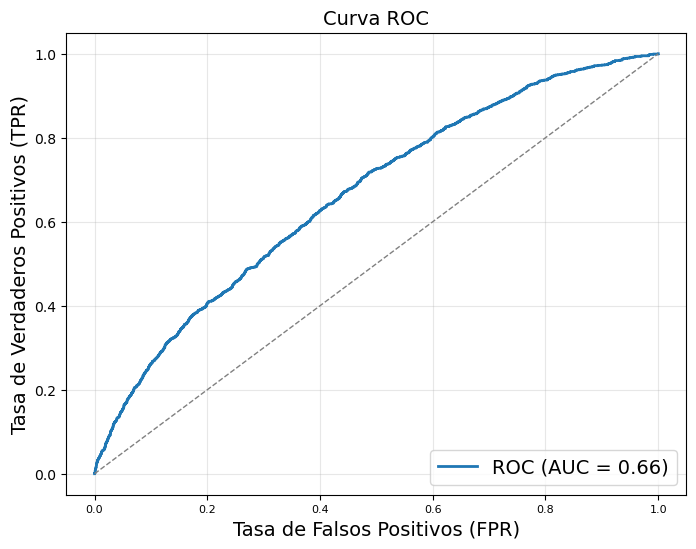

Área bajo la curva ROC: 0.66


In [74]:
from sklearn.model_selection import cross_validate

# Definir el mejor modelo
best_model = random_search.best_estimator_

# Validación cruzada para obtener múltiples métricas
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results = cross_validate(best_model, X_train, y_train, cv=3, scoring=scoring, return_train_score=False)

# Mostrar métricas de evaluación cruzada
print(f"Exactitud en el conjunto de entrenamiento: {np.mean(cv_results['test_accuracy']):.2f}")
print(f"Precisión en el conjunto de entrenamiento: {np.mean(cv_results['test_precision']):.2f}")
print(f"Sensibilidad en el conjunto de entrenamiento: {np.mean(cv_results['test_recall']):.2f}")
print(f"F1-Score en el conjunto de entrenamiento: {np.mean(cv_results['test_f1']):.2f}")
print(f"Área bajo la curva ROC: {np.mean(cv_results['test_roc_auc']):.2f}")

# Calcular la curva ROC
if hasattr(best_model, 'predict_proba'):
    y_train_proba = cross_val_predict(best_model, X_train, y_train, cv=3, method='predict_proba')[:, 1]
    fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)
    roc_auc = roc_auc_score(y_train, y_train_proba)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.2f})', lw=2)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Línea de referencia
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()

    print(f'Área bajo la curva ROC: {roc_auc:.2f}')
else:
    print("El modelo no soporta 'predict_proba', no se puede calcular la curva ROC.")


### PRESENTACIÓN DE LA SOLUCIÓN

Guarda mejor modelo (pipeline de preparación de los datos + modelo) y  haz un script de python que te pida los datos necesarios ('int_rate', 'installment', 'fico',  'revol_bal', 'revol_util', 'inq_last_6mths', 'pub_rec' y 'purpose') y prediga la solución.

In [75]:
joblib.dump(best_model, "./modelo2_8Prestamos.pkl")

['./modelo2_8Prestamos.pkl']

## EJERCICIO 2

Vamos a trabajar conun conjunto de datos digits.

Crea un clasificador que nos diga de que número se trata.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [80]:
# Cargar el conjunto de datos
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

#### EXPLORAR LOS DATOS

In [81]:
X_digits

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [82]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [83]:
X_digits.shape

(1797, 64)

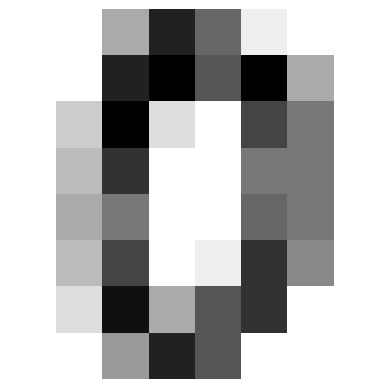

0


In [84]:
def plot_digit(image_data):
    image = image_data.reshape(8, 8)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X_digits[0]
plot_digit(some_digit)
plt.show()
print(y_digits[0])

In [87]:
# Obtener los valores únicos y sus cantidades
unique_elements, counts = np.unique(y_digits, return_counts=True)

# Mostrar los resultados
for element, count in zip(unique_elements, counts):
    print(f'Elemento {element} aparece {count} veces')

Elemento 0 aparece 178 veces
Elemento 1 aparece 182 veces
Elemento 2 aparece 177 veces
Elemento 3 aparece 183 veces
Elemento 4 aparece 181 veces
Elemento 5 aparece 182 veces
Elemento 6 aparece 181 veces
Elemento 7 aparece 179 veces
Elemento 8 aparece 174 veces
Elemento 9 aparece 180 veces


#### DIVIDIR LOS DATOS

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_digits,y_digits, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

In [88]:
# Preprocesamiento con StandardScaler para todas las columnas
preprocessing = ColumnTransformer([
    ("scaler", StandardScaler(), slice(0, X_train.shape[1]))  # Aplica a todas las características
])

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Usa evaluación cruzada con los siguientes algoritmos, evalua los resultados en el conjunto de entrenamiento (exactitud) y calcula la matriz de confusión:
- Regresión logistica
- Maquinas de vectores de sorpote
- Random forest

Entrenando y probando el modelo: Regresión logistica
Exactitud en el conjunto de entrenamiento: 0.96


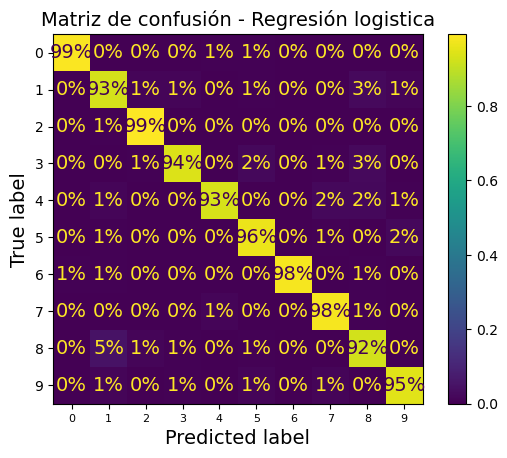

Entrenando y probando el modelo: Maquinas de vectores de soporte
Exactitud en el conjunto de entrenamiento: 0.97


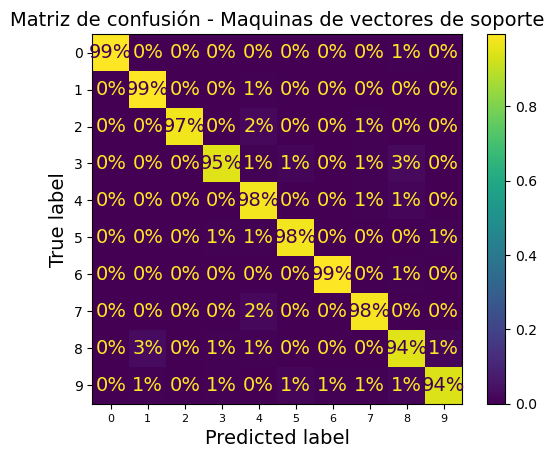

Entrenando y probando el modelo: Random forest
Exactitud en el conjunto de entrenamiento: 0.97


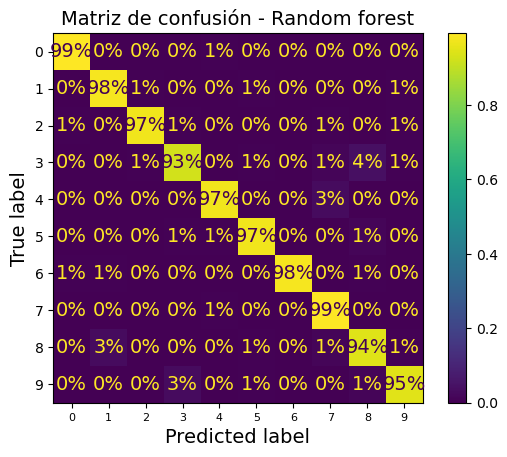

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


models = {
    "Regresión logistica":LogisticRegression(random_state=42, max_iter=1000),
    "Maquinas de vectores de soporte":SVC(random_state=42, max_iter=1000),
    "Random forest":RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    print(f"Entrenando y probando el modelo: {name}")
    
    # Crear pipeline
    pipeline = make_pipeline(preprocessing, model)
    
    # Realizar la validación cruzada para obtener las predicciones sobre el conjunto de entrenamiento
    y_train_pred = cross_val_predict(pipeline, X_train, y_train, cv=3)
    
    # Calcular la exactitud en el conjunto de entrenamiento
    acc_train = accuracy_score(y_train, y_train_pred)
    print(f"Exactitud en el conjunto de entrenamiento: {acc_train:.2f}")
    
    # Calcular y mostrar la matriz de confusión
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_train_pred, normalize="true", values_format=".0%"
    )
    plt.title(f"Matriz de confusión - {name}")
    plt.show()

### OPMITZACIÓN DEL MODELO

#### OPTIMIZACIÓN

Usa búsqueda exhaustiva o búsqueda aleatoria para optimizar el mejor modelo del apartado anterior

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Creamos la pipeline

pipeline = make_pipeline(preprocessing,SVC())

# Espacio de hiperparámetros a explorar
param_dist = {
    "svc__C": np.logspace(-3, 3, 10),  # Valores entre 0.001 y 1000 en escala logarítmica
    "svc__gamma": np.logspace(-3, 3, 10),  # Similar a C
    "svc__kernel": ["linear", "rbf", "poly", "sigmoid"],  # Tipos de kernel
    "svc__degree": [2, 3, 4],  # Para kernels polinomiales
}

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    scoring="accuracy",  # Métrica de evaluación
    cv=5,  # Validación cruzada con 5 folds
    random_state=42,
    verbose=1,  # Mostrar progreso
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Realizar la búsqueda aleatoria en el conjunto de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


Mejores hiperparámetros: {'svc__kernel': 'poly', 'svc__gamma': 0.1, 'svc__degree': 2, 'svc__C': 215.44346900318823}


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [93]:
# Evaluar el mejor modelo en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba: {accuracy:.2f}")

Exactitud en el conjunto de prueba: 0.99


### PRESENTACIÓN DE LA SOLUCIÓN

Simplemente guarda el modelo

In [94]:
joblib.dump(best_model, "./modelo2_8Digitos.pkl")

['./modelo2_8Digitos.pkl']

## EJERCICIO 3

Vamos a trabajar con un conjunto de datos donde cada instancia (en este caso, cada película) pueda tener múltiples etiquetas (géneros en este caso).

Tienes los datos en el fichero tmdb_5000_movies.csv

Crea un clasificador que te diga los generos que le corresponden a cada película.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [53]:
# Cargar los datos
data = pd.read_csv("datos/tmdb_5000_movies.csv")

# Preprocesamiento de datos
# Transformar géneros en listas de palabras separadas
data["genres"] = data["genres"].apply(lambda x: [genre["name"] for genre in eval(x)])

# Dividir los datos en características (X) y etiquetas (y)
X = data["overview"]
y = data["genres"]

#### EXPLORAR LOS DATOS

In [54]:
len(X)

4803

In [55]:
print(X.head())

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object


In [56]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4800 non-null   object
dtypes: object(1)
memory usage: 37.7+ KB


In [ ]:
# Hay 3 valores nulos de 4800, los podemos quitar directamente

In [57]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 37.7+ KB


In [58]:
print(X[0])

In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.


In [59]:
# Es la sinopsis de Avatar, vamos a ver sus etiquetas
print(y[0])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [60]:
# Extraer los valores únicos
unique_genres = set(genre for genres_list in y for genre in genres_list)

# Mostrar el resultado
print("Géneros únicos:", unique_genres)
print(f"Cantidad de géneros únicos:{len(unique_genres)}")

Géneros únicos: {'Documentary', 'Action', 'Music', 'Western', 'History', 'War', 'Adventure', 'Science Fiction', 'Family', 'Romance', 'Foreign', 'Animation', 'TV Movie', 'Mystery', 'Fantasy', 'Drama', 'Comedy', 'Horror', 'Thriller', 'Crime'}
Cantidad de géneros únicos:20


#### DIVIDIR LOS DATOS

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### PREPARAR LOS DATOS

Tienes aquí las transformaciones que hay que hacer a los datos pero busca en internet que estamos haciendo exactamente y explicalo (igual hay que hacer algo con los datos que faltan)

In [ ]:
# TdidfVectorizer convierte a vectores numéricos las palabras de las descripciones, asignandoles valores tanto por la repetición como la importancia de la palabra
# MultiLabelBinarizer convierte las etiquetas a binario para darles un ID según la combinación, supongo que si tenemos las etiquetas A B C lo convertira en 1 1 0 para A y B o 0 1 1 para B y C y así

In [ ]:
# Eliminar filas con NaN en X_train y X_test
X_train = X_train.dropna()
X_test = X_test.dropna()
# Eliminar filas con NaN en y_train y y_test
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

mlb = MultiLabelBinarizer()
y_train_transformed = mlb.fit_transform(y_train)
y_test_transformed = mlb.transform(y_test)

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea un modelo Random Forest y evalúa el modelo en el conjunto de entrenamiento (accuracy), no hace falta usar validación cruzada.

In [64]:
# Crear el modelo
model= RandomForestClassifier()

# Entrenar el modelo con todo el conjunto de entrenamiento
model.fit(X_train_tfidf, y_train_transformed)

# Evaluar en el conjunto de prueba
y_pred = model.predict(X_train_tfidf)
acc_test = accuracy_score(y_train_transformed, y_pred)
print(f"Exactitud en el conjunto de entrenamiento: {acc_test:.2f}")

Exactitud en el conjunto de entrenamiento: 1.00


#### EVALUACIÓN EN EL CONJUNTO DE PRUEBA

In [66]:
# Evaluar en el conjunto de prueba
y_pred = model.predict(X_test_tfidf)
acc_test = accuracy_score(y_test_transformed, y_pred)
print(f"Exactitud en el conjunto de prueba: {acc_test:.2f}")

Exactitud en el conjunto de prueba: 0.08


In [72]:
pred = mlb.inverse_transform(y_pred)
print(pred[:25])

[(), (), ('Drama',), ('Drama',), (), (), ('Drama',), (), (), (), ('Action',), ('Comedy', 'Drama', 'Romance'), ('Drama',), ('Drama',), (), ('Drama',), ('Drama', 'Romance'), (), ('Drama',), (), ('Drama',), ('Drama', 'Romance'), (), ('Comedy', 'Drama', 'Romance'), ('Drama',)]


Evalúa el modelo en el conjuno de prueba y muestra las primeras 25 predicciones y sus correspondientes valores reales (con texto, para lo cual tendras que aplicar mlb.inverse_transform a las predicciones).

¿Qué puedes deducir del resultado?

In [ ]:
# Hay aciertos que directamente no saca ninguna etiqueta
# Intenta adivinar con Drama muchisimas veces y si le añade algún género más son comedia o romance
# Puede que la sinopsis no sea suficiente para sacar conclusiones, o que el texto es demasiado corto

In [74]:
drama_count = sum(1 for genres_list in y if "Drama" in genres_list)
print(f"Cantidad del genero drama: {drama_count} VS cantidad de peliculas {len(y)}")

Cantidad del genero drama: 2297 VS cantidad de peliculas 4803
